In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate();

  Activating new project at `~/Documents/eth_courses/notebooks/duckietown_course`


In [30]:
using LinearAlgebra
using ControlSystems
using GLMakie
using DifferentialEquations

GLMakie.activate!(inline=true)

# First Order System

In [3]:
# forcing function
u(t) = 1

first_order_sys!(t,x;τ,u) = (u(t) - x) / τ

function first_order_sys!(dX, X, params, t)

    # extract the parameters
    τ = params.τ

    # extract the state
    x = X[1]
    
    # x_dot = (u(t) - x) / τ
    x_dot = first_order_sys!(t,x;τ=τ,u=u)

    dX[1] = x_dot
end

first_order_sys! (generic function with 2 methods)

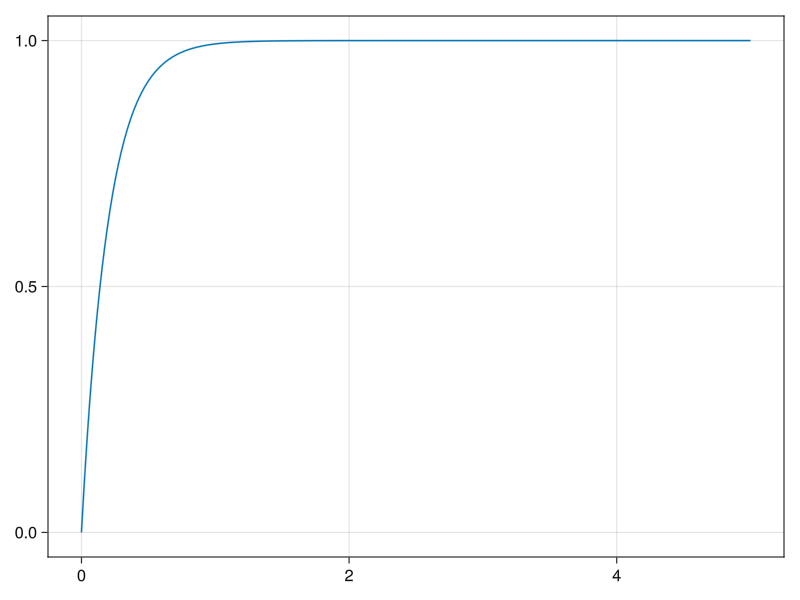

In [6]:
u0 = [0.0]
tspan = (0.0, 5.0)
params = (;τ=0.2)

prob = ODEProblem(first_order_sys!, u0, tspan, params)
sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8)


# plotting
lines(sol.t, vcat(sol.u...))

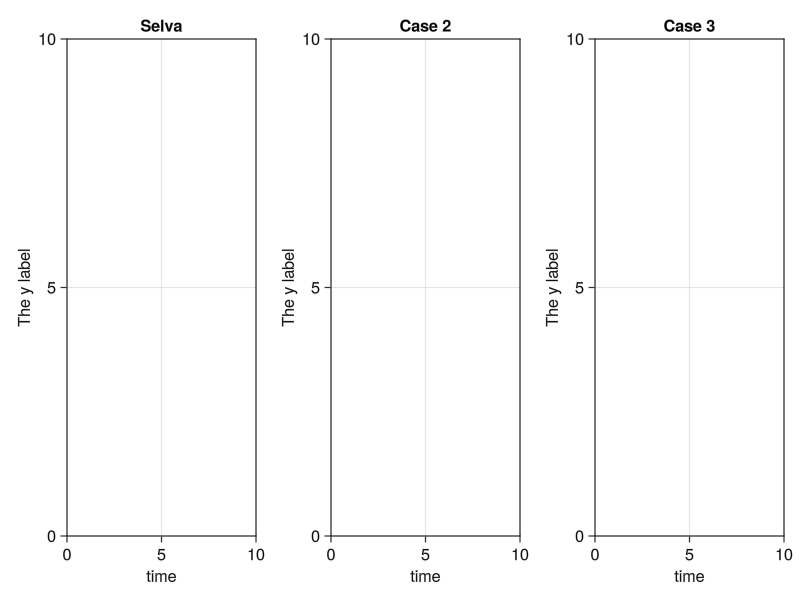

Lines{Tuple{Vector{Point{2, Float32}}}}

In [49]:
# plotting
fig = Figure()

axs = Axis[]

for i in 1:3
    ax = Axis(fig[1, i],
    title = "Case $i",
    xlabel = "time",
    ylabel = "The y label")
    
    push!(axs, ax)
end
display(fig)

# Case 1
u0 = [0.0]
tspan = (0.0, 5.0)
params = (;τ=0.2)

prob = ODEProblem(first_order_sys!, u0, tspan, params)
sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8

lines!(axs[1], sol.t, vcat(sol.u...))
axs[1].title = "Params."


# Second Order System

In [119]:
second_order_sys!(t, x, x_dot; ζ, ω_n,u) = (-2 * ζ * ω_n * x_dot) - (ω_n^2 *x) + u(t)

# forcing function
u(t) = 1

function second_order_sys!(dX, X, params, t)

    # extract the parameters
    ζ = params.ζ #damping_ratio
    ω_n = params.ω_n #natural_frequency

    # extract the state
    x = X[1]
    x_dot = X[2]

    x_ddot = second_order_sys!(t, x, x_dot; ζ=ζ, ω_n=ω_n, u) 
    
    dX[1] = x_dot
    dX[2] = x_ddot
end

second_order_sys! (generic function with 2 methods)

### Conventional form

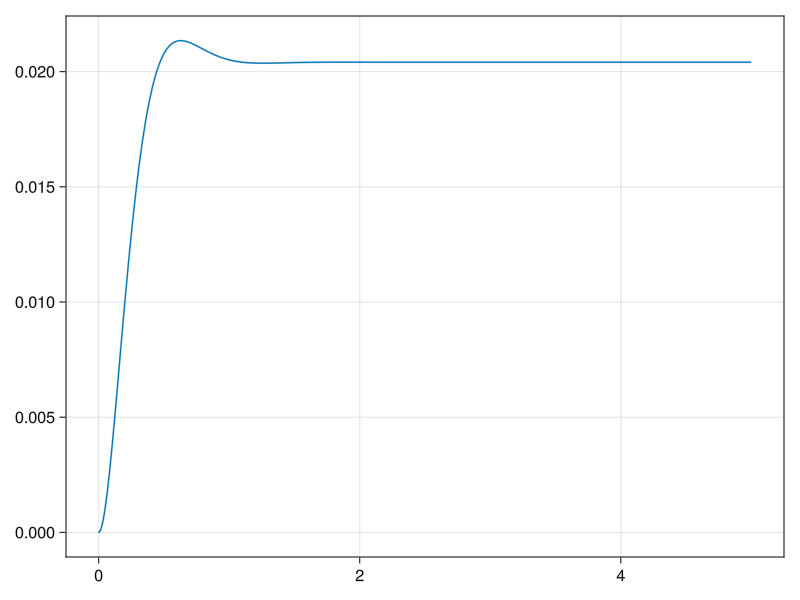

In [120]:
u0 = [0.0, 0.0]
tspan = (0.0, 5.0)

ζ=0.7 # damping ratio 
ω_n = 7 # natural frequency [rad/s]

params = (ζ=ζ, ω_n = ω_n)

prob = ODEProblem(second_order_sys!, u0, tspan, params)
sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8)


# plotting
y = reduce(hcat, sol.u) 
lines(sol.t, y[1,:])

### Time constant form

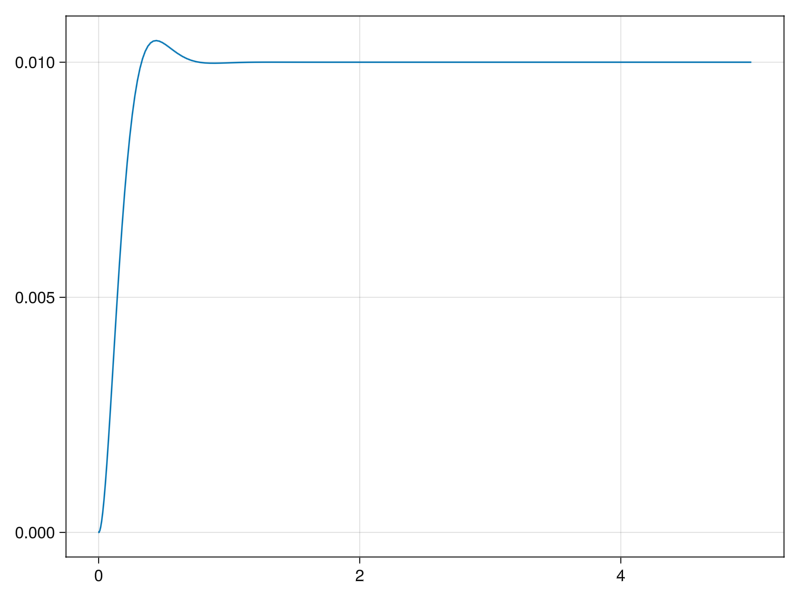

In [121]:
u0 = [0.0, 0.0]
tspan = (0.0, 5)

τ = 0.1 # time constant [s]
ζ= 0.7 # damping ratio 

params = (ζ=ζ, ω_n = 1/τ)

prob = ODEProblem(first_order_system!, u0, tspan, params)
sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8)


# plotting
y = reduce(hcat, sol.u) 
lines(sol.t, y[1,:])